<a href="https://colab.research.google.com/github/hsargoli/MyWorks/blob/main/images_haarCasCade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

face detection with openCv: cascading method

[link](https://pyimagesearch.com/2021/04/12/opencv-haar-cascades/)

the algorithm break the task of identify the face into thousands of smaller bit sized tasks which is easy to solve (these tasks called classifier)

In [ ]:
import matplotlib.pyplot as plt
import cv2

face 0
top left x: 101  y: 28,	 down right  x 137  y   64 
face 1
top left x: 190  y: 40,	 down right  x 230  y   80 
face 2
top left x: 25  y: 17,	 down right  x 67  y   59 
[[101  28  36  36]
 [190  40  40  40]
 [ 25  17  42  42]]


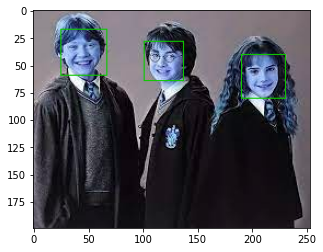

In [ ]:

detector = cv2.CascadeClassifier('/content/drive/MyDrive/haarcascade_frontalface_default.xml')
c = cv2.imread('/content/drive/MyDrive/harry.jpg')
results = detector.detectMultiScale(
		c, scaleFactor=1.05, minNeighbors=5,
		minSize=(30, 30), flags=cv2.CASCADE_SCALE_IMAGE)
for i in range(len(results)):
  a = results[i]
  lux = a[0]
  luy = a[1]
  ldx = a[0] + a[2]
  ldy = a[1] + a[3]
  print(f'face {i}\ntop left x: {lux}  y: {luy},\t down right  x {ldx}  y   {ldy} ')
  cv2.rectangle(c, pt1=(lux,luy), pt2=(ldx,ldy), color=(13,200,0), thickness=1)
  del a
print(results)
plt.imshow(c)
plt.show()

In [92]:
image = cv2.imread('/content/billboard.jpg')
pixels = np.asarray(image)
pixels /= 255.0

Data Type: uint8
Min: 0.000, Max: 255.000
Min: 0.000, Max: 1.000


# integral image

In [2]:
import cv2
import numpy as np

def integral_image(path):
  aimg = cv2.imread(path, 0)
  print(aimg.shape)
  x, y = aimg.shape
  Nimg = np.zeros([x,y])
  print(aimg)  
  for i in range(x):
    xrow = []
    for j in range(y):
      a = aimg[:i,:j+1]
      xrow.append(aimg[i][j])
      Nimg[i][j] = sum(xrow) + np.sum(a)
      #print(f'ij = {i,j}\n a ={a} , {np.sum(a)}', sum(xrow), sep='\n')
    del xrow
  return Nimg

cc = integral_image('/content/drive/MyDrive/vsi2.jpg')
cc

(6, 7)
[[  2   7   0  10   0   0   0]
 [  0   1  10   1   7   0 127]
 [  0   1   0   0   7   0   0]
 [  0   0   0   0   0   0 127]
 [255   0   0   1   3   0   0]
 [  3   1   0   0   7   0 127]]


array([[  2.,   9.,   9.,  19.,  19.,  19.,  19.],
       [  2.,  10.,  20.,  31.,  38.,  38., 165.],
       [  2.,  11.,  21.,  32.,  46.,  46., 173.],
       [  2.,  11.,  21.,  32.,  46.,  46., 300.],
       [257., 266., 276., 288., 305., 305., 559.],
       [260., 270., 280., 292., 316., 316., 697.]])

In [76]:
cc = integral_image('/content/drive/MyDrive/vsi2.jpg')

def sum_window(integral_image, initx, inity,w ,h):
  #print(integral_image)

  #print(f'\nwe want a windows started at {(inity,initx)} X width and height {(w,h)} ')
  try:
    init_point = integral_image[initx, inity]
    down_right = integral_image[initx + h, inity + w]
    if initx == inity == 0:
      return down_right

    if inity == 0:
      top_right =  integral_image[initx -1, inity + w]
      return   down_right - top_right

    if initx == 0:
      down_left =  integral_image[initx ,inity -1]
      return down_right - down_left

    top_right =  integral_image[initx -1, inity + w]
    down_left =  integral_image[initx ,inity -1]
    top_left  =  integral_image[initx -1, inity-1]
    box_sum = down_right + top_left - top_right - down_left
    #print(init_point,down_right,top_right,down_left,top_left,sep = '\t')
    return box_sum
  except:
    wimage, himage = integral_image.shape
    if w + initx > wimage :
      return 'width_problem'
    if h + inity >himage:
      return 'height_problem'
sum_window(cc, 0, 1, 3, 1)


(6, 7)
[[  2   7   0  10   0   0   0]
 [  0   1  10   1   7   0 127]
 [  0   1   0   0   7   0   0]
 [  0   0   0   0   0   0 127]
 [255   0   0   1   3   0   0]
 [  3   1   0   0   7   0 127]]


36.0

A Haar-like feature considers adjacent rectangular regions at a specific location in a detection window sums up the pixel intensities in each region and calculates the difference between these sums

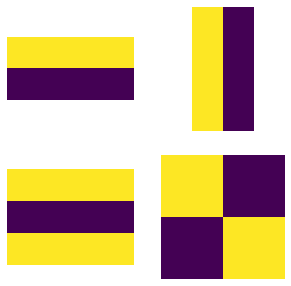

In [ ]:
# Haar features
import numpy as np
haar1 = np.array([
                  [1,1,1,1],[0,0,0,0]
                  ])
haar2 = np.array([
                  [1,0],[1,0],[1,0],[1,0]
                  ])
haar3 = np.array([
                  [1,1,1,1],[0,0,0,0],[1,1,1,1]
                  ])
haar4 = np.array([
                  [1,0],[0,1]
                  ])
haar5 = np.array([
                  [1,0,1],[1,0,1],[1,0,1],[1,0,1]
                  ])
plt.figure(figsize =(5,5))
plt.subplot(221),plt.imshow(haar1),plt.axis('off')
plt.subplot(222),plt.imshow(haar2),plt.axis('off')
plt.subplot(223),plt.imshow(haar3),plt.axis('off')
plt.subplot(224),plt.imshow(haar4),plt.axis('off')
plt.show()

In [79]:
def haarA(img):
  w, h = img.shape
  for i in range(0,w,2):
    for j in range(0,h,2):
      summ1 = sum_window(img,i,j,2,0)
      summ2 = sum_window(img,i+1,j,2,0)
      if summ1 and summ2:
        miu1 = summ1 / 3
        miu2 = summ2 / 3
        teta = miu1 - miu2 
        if teta > 0.7:
          print(i,j,summ1,summ2,teta,sep = '\t',end = '\n\n')
haarA(cc)

4	0	255.0	4.0	83.66666666666667



In [102]:
###################################
# T
###################################
import cv2
import numpy as np
def integral_image(aimg):
  print(aimg.shape)
  x, y = aimg.shape
  Nimg = np.zeros([x,y])
  print(aimg)  
  for i in range(x):
    xrow = []
    for j in range(y):
      a = aimg[:i,:j+1]
      xrow.append(aimg[i][j])
      Nimg[i][j] = sum(xrow) + np.sum(a)
    del xrow
  return Nimg


def sum_window(integral_image, initx, inity,w ,h):
  try:
    init_point = integral_image[initx, inity]
    down_right = integral_image[initx + h, inity + w]
    if initx == inity == 0:
      return down_right

    if inity == 0:
      top_right =  integral_image[initx -1, inity + w]
      return   down_right - top_right

    if initx == 0:
      down_left =  integral_image[initx ,inity -1]
      return down_right - down_left

    top_right =  integral_image[initx -1, inity + w]
    down_left =  integral_image[initx ,inity -1]
    top_left  =  integral_image[initx -1, inity-1]
    box_sum = down_right + top_left - top_right - down_left
    return box_sum
  except:
    wimage, himage = integral_image.shape
    if w + initx > wimage :
      #print('width_problem')
      return False
    if h + inity >himage:
      #print('height_problem')
      return False
def haarA(img):
  w, h = img.shape
  for i in range(0,w,20):
    for j in range(0,h,20):
      summ1 = sum_window(img,i,j,20,4)
      summ2 = sum_window(img,i+1,j,20,4)
      if summ1 and summ2:
        miu1 = summ1 / 3
        miu2 = summ2 / 3
        teta = miu1 - miu2 
        if 1.5 > teta > 0.7:
          print(i,j,teta,sep = '\t',end = '\n\n')
image = cv2.imread('/content/billboard.jpg',0)
pixels = np.asarray(image)
pixels = pixels.astype('float32')
pixels /= 255.0
integ = integral_image(pixels)

haarA(integ)


(172, 294)
[[0.5058824  0.5058824  0.5058824  ... 0.4862745  0.4862745  0.4862745 ]
 [0.5058824  0.5058824  0.5058824  ... 0.4862745  0.4862745  0.4862745 ]
 [0.5058824  0.5058824  0.5058824  ... 0.4862745  0.4862745  0.4862745 ]
 ...
 [0.07450981 0.0627451  0.06666667 ... 0.627451   0.62352943 0.61960787]
 [0.16862746 0.11372549 0.07843138 ... 0.627451   0.62352943 0.61960787]
 [0.50980395 0.40784314 0.30588236 ... 0.627451   0.62352943 0.61960787]]
120	0	1.0693316658337935

120	40	1.2496607129772457

120	200	0.8597579910419881

140	60	0.8811262004698364

140	80	0.9006466123585923

140	120	0.7362247795487491

140	140	0.7296786199634226

140	160	0.7030471852049232

160	60	0.9436695901677012



In [42]:
# tries - - - tries - - -tries - - - tries - - -tries - - - tries - - -
# tries - - - tries - - -tries - - - tries - - -tries - - - tries - - -
# tries - - - tries - - -tries - - - tries - - -tries - - - tries - - -
# tries - - - tries - - -tries - - - tries - - -tries - - - tries - - -

# def sum_window(integral_image, initx, inity,w ,h):
  w -= 1
  h -= 1
  wimage, himage = integral_image.shape
  if w + initx > wimage :
    return 'width_problem'
  if h + inity >himage:
    return 'height_problem'
  init_point = integral_image[initx, inity]
  down_right = integral_image[inity + h, initx + w]

  if initx == inity == 0:
    return down_right

  if inity == 0:
    down_left =  integral_image[inity + h, initx -1]
    return   down_right - down_left

  if initx == 0:
    top_right =  integral_image[inity -1, initx + w]
    return down_right - top_right

  top_right =  integral_image[inity -1, initx + w]
  down_left =  integral_image[inity + h, initx -1]
  top_left  =  integral_image[initx -1, inity-1]
  box_sum = down_right + top_left - top_right - down_left
  return box_sum
sum_window(cc, 1, 2, 3, 1)

8.0

In [ ]:
# tries - - - tries - - -tries - - - tries - - -tries - - - tries - - -
# tries - - - tries - - -tries - - - tries - - -tries - - - tries - - -
# tries - - - tries - - -tries - - - tries - - -tries - - - tries - - -
# tries - - - tries - - -tries - - - tries - - -tries - - - tries - - -

#import cv2
#import numpy as np

def integral_image(path):
  aimg = cv2.imread(path, 0)
  print(aimg.shape)
  x, y = aimg.shape
  Nimg = np.zeros([x,y])
  bimg = aimg.T
  for i in range(x):
    xrow = []
    for j in range(y):
      #print('----   ',i,j, aimg[i][j])
      xrow.append(aimg[i][j])
      if i >= 1:
        xrow.append(aimg[i-1][j])
      Nimg[i][j] = sum(xrow)
    del xrow
  print(aimg,Nimg,sep = '\n\n')
integral_image('/content/drive/MyDrive/vsi2.jpg')

please tell me your age: 20
please tell me your height in CM format: 150


'You are welcome to use our karting'

In [ ]:
# tries - - - tries - - -tries - - - tries - - -tries - - - tries - - -
# tries - - - tries - - -tries - - - tries - - -tries - - - tries - - -
# tries - - - tries - - -tries - - - tries - - -tries - - - tries - - -

initx = 1
inity = 1
w = 2
h = 0

init_point = cc[initx, inity]
down_right = cc[inity + h, initx + w]
top_right = cc[inity -1, initx + w]
b_l = cc[inity + h, initx -1]
t_l =cc[initx -1, inity-1]

box_sum = down_right + t_l - top_right - b_l
print(f'{box_sum} \n in {init_point} ,   dR {down_right} ,  TR {top_right}   {b_l} {t_l}')